# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [3]:
df = pd.read_csv("C:/Users/sega9/Documents/IBM Data Science/Capstone/data/vehicles.csv")

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 25 columns):
id              435849 non-null int64
url             435849 non-null object
region          435849 non-null object
region_url      435849 non-null object
price           435849 non-null int64
year            434732 non-null float64
manufacturer    415102 non-null object
model           429650 non-null object
condition       249043 non-null object
cylinders       269465 non-null object
fuel            432858 non-null object
odometer        360701 non-null float64
title_status    434043 non-null object
transmission    433703 non-null object
vin             239197 non-null object
drive           313838 non-null object
size            139888 non-null object
type            318741 non-null object
paint_color     300602 non-null object
image_url       435825 non-null object
description     435822 non-null object
county          0 non-null float64
state           435849 non-null obj

## Clean Data for Exploration

In [6]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1117
manufacturer     20747
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer         75148
title_status      1806
transmission      2146
vin             196652
drive           122011
size            295961
type            117108
paint_color     135247
image_url           24
description         27
county          435849
state                0
lat               8235
long              8235
dtype: int64

In [7]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [8]:
df.drop(columns=['id', 'url', 'region_url', 'image_url'], inplace=True)

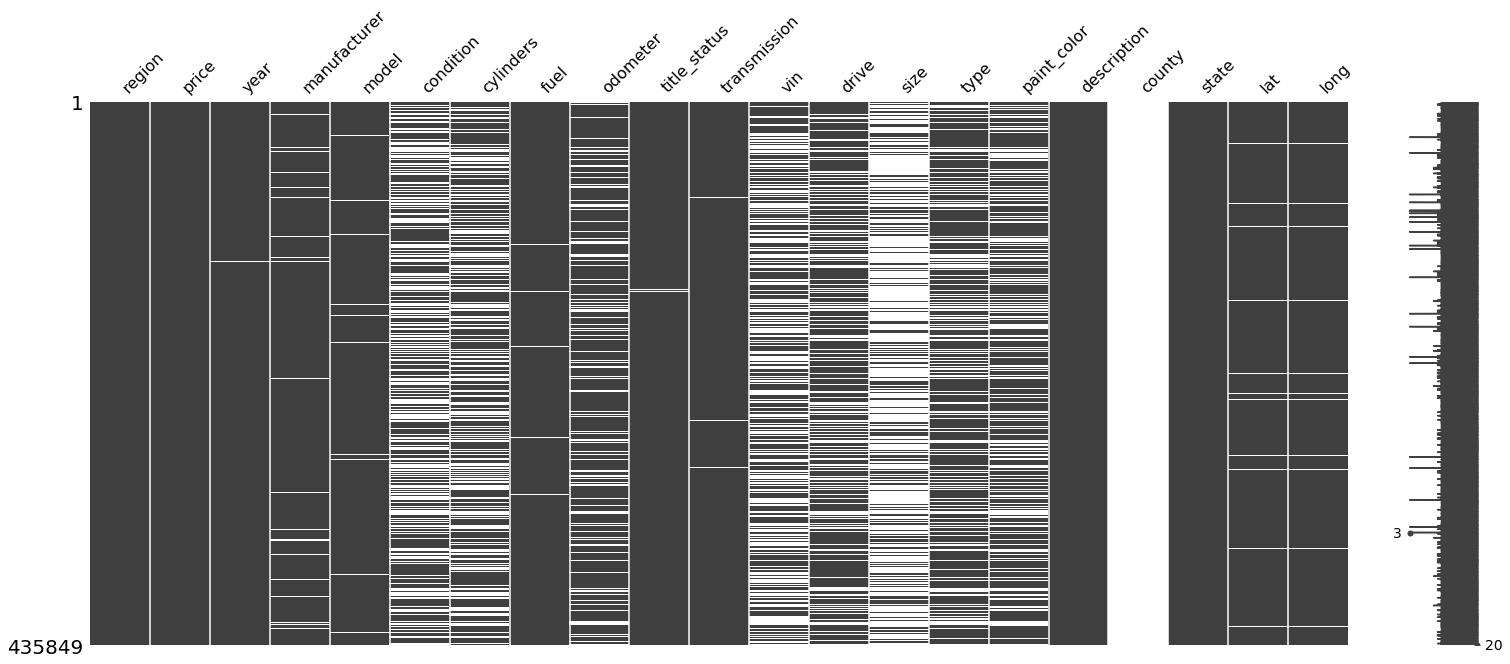

In [9]:
import missingno as msno
msno.matrix(df)
plt.show()

## Visualization

C:\Users\sega9\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


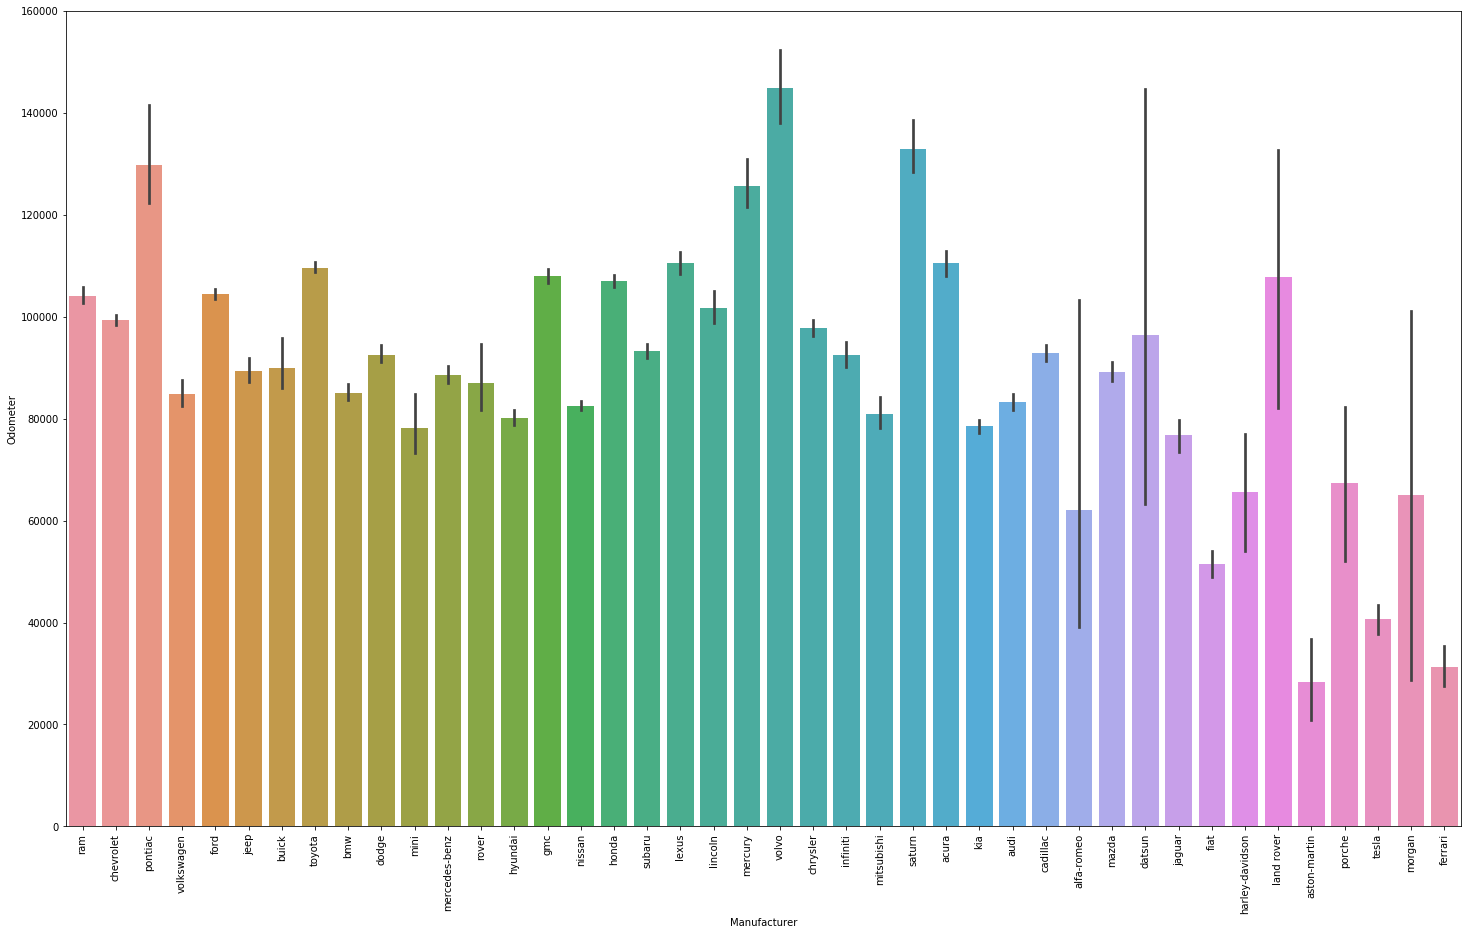

In [10]:
# Odemeter values by manufacturer

df=df.sort_values(by=['odometer'],ascending=False)
plt.figure(figsize=(25,15))
sns.barplot(x=df.manufacturer, y=df.odometer)
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Odometer')
plt.show()

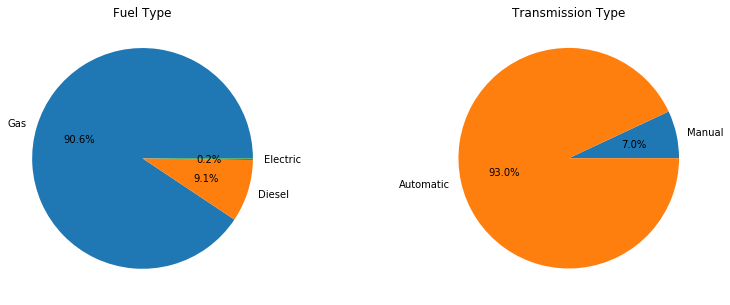

In [11]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

labels = 'Gas', 'Diesel', 'Electric'
sizes = [sum(df["fuel"]=="gas"), sum(df["fuel"]=="diesel"), sum(df["fuel"]=="electric")]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title("Fuel Type")

labels = 'Manual', 'Automatic'
sizes = [sum(df["transmission"]=="manual"), sum(df["transmission"]=="automatic")]
ax2.pie(sizes, labels=labels, autopct='%1.1f%%')
ax2.axis('equal')
ax2.set_title("Transmission Type")

plt.subplots_adjust(wspace = .75)
plt.show()

Text(0.5,1,'Price')

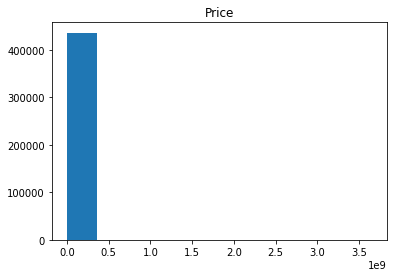

In [12]:
plt.hist(df['price'], bins=10)
plt.title('Price')

In [13]:
print ("Number of regions: " + str(len(df['region'].unique())))

Number of regions: 403


In [14]:
print ('Top 10 Regions:')
print (df['region'].value_counts().iloc[:10])

Top 10 Regions:
springfield        3595
jacksonville       3461
columbus           3288
fayetteville       3142
richmond           3046
bend               2990
salem              2990
fresno / madera    2987
portland           2984
des moines         2984
Name: region, dtype: int64


Text(0.5,1,'Listings per Region')

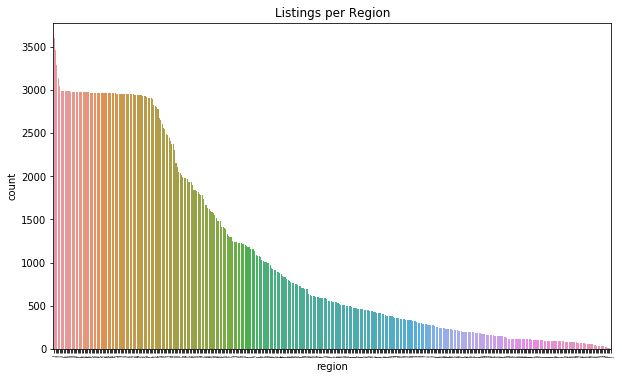

In [16]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='region',data=df,order=df['region'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), fontsize=0);
ax.set_title("Listings per Region")